##Black Friday Sales EDA {Rini paul}
######A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, citytype, stayincurrentcity), product details (productid and product category) and Total purchaseamount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [6]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df= pd.read_csv("/content/train.csv",index_col=0)

In [ ]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
1000981,P00242742,M,26-35,20,B,2,1,1,2.0,9.0,4257.0
1000982,P00365242,F,26-35,9,C,4+,0,5,8.0,NaN,8666.0
1000982,P00025942,F,26-35,9,C,4+,0,8,14.0,NaN,8026.0


In [8]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
#renaming columns for better understanding
df = df.rename({'City_Category':'City','Stay_In_Current_City_Years':'Years','Product_Category_1':'Product1','Product_Category_2':'Product2',
                    'Product_Category_3':'Product3'},axis=1)

In [10]:
df.head()

,Product_ID,Gender,Age,Occupation,City,Years,Marital_Status,Product1,Product2,Product3,Purchase
User_ID,,,,,,,,,,,
1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45171 entries, 1000001 to 1000982
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Product_ID      45171 non-null  object 
 1   Gender          45171 non-null  object 
 2   Age             45171 non-null  object 
 3   Occupation      45171 non-null  int64  
 4   City            45171 non-null  object 
 5   Years           45171 non-null  object 
 6   Marital_Status  45171 non-null  int64  
 7   Product1        45171 non-null  int64  
 8   Product2        31030 non-null  float64
 9   Product3        13786 non-null  float64
 10  Purchase        45170 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.1+ MB


In [12]:
df.notnull().sum()

Product_ID        45171
Gender            45171
Age               45171
Occupation        45171
City              45171
Years             45171
Marital_Status    45171
Product1          45171
Product2          31030
Product3          13786
Purchase          45170
dtype: int64

In [13]:
df.isnull().sum()

Product_ID            0
Gender                0
Age                   0
Occupation            0
City                  0
Years                 0
Marital_Status        0
Product1              0
Product2          14141
Product3          31385
Purchase              1
dtype: int64

In [14]:
df.shape

(45171, 11)

In [15]:
df.dtypes

Product_ID         object
Gender             object
Age                object
Occupation          int64
City               object
Years              object
Marital_Status      int64
Product1            int64
Product2          float64
Product3          float64
Purchase          float64
dtype: object

In [16]:
df.duplicated()

User_ID
1000001    False
1000001    False
1000001    False
1000001    False
1000002    False
           ...  
1000981    False
1000982    False
1000982    False
1000982    False
1000982    False
Length: 45171, dtype: bool

In [17]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City', 'Years',
       'Marital_Status', 'Product1', 'Product2', 'Product3', 'Purchase'],
      dtype='object')

In [67]:
df.describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,45171.000000,45171.000000,45171.000000,31030.000000,13786.000000,45170.000000
mean,8.153882,0.408758,5.295787,9.868611,12.714058,9298.801616
std,6.571811,0.491610,3.719120,5.068817,4.114985,4950.247608
min,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.000000,0.000000,1.000000,5.000000,9.000000,5869.000000
50%,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,14.000000,1.000000,8.000000,15.000000,16.000000,12037.000000
max,20.000000,1.000000,18.000000,18.000000,18.000000,23958.000000


##Outlier Dectection

In [21]:
#Box Plot
df_box = df.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x7bdbd184ad70>,
 'caps': [<matplotlib.lines.Line2D at 0x7bdbd184b2b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bdbd184aad0>],
 'medians': [<matplotlib.lines.Line2D at 0x7bdbd184b7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7bdbd184ba90>],
 'means': []}

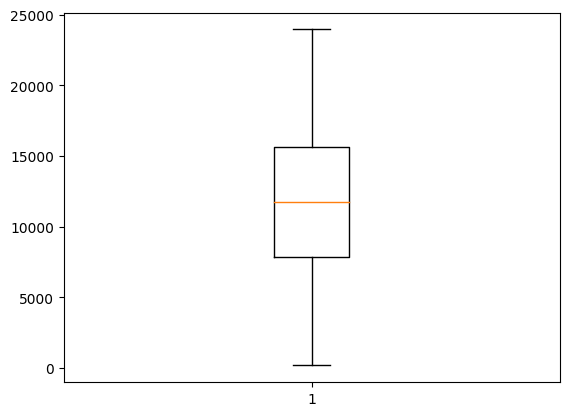

In [22]:
plt.boxplot(df_box.Purchase)

<Axes: >

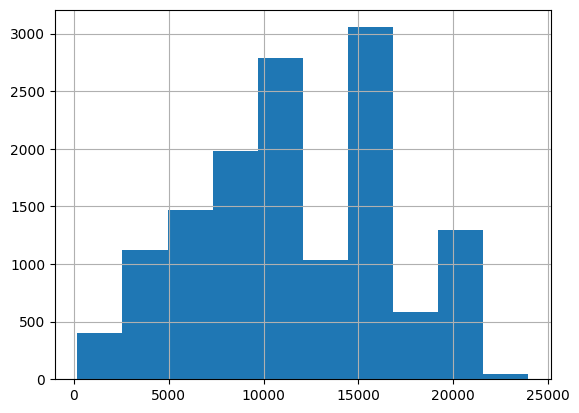

In [23]:
df_box['Purchase'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7939e3310670>,
 'caps': [<matplotlib.lines.Line2D at 0x7939e31cc3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7939e3310970>],
 'medians': [<matplotlib.lines.Line2D at 0x7939e31cca00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7939e31ccca0>],
 'means': []}

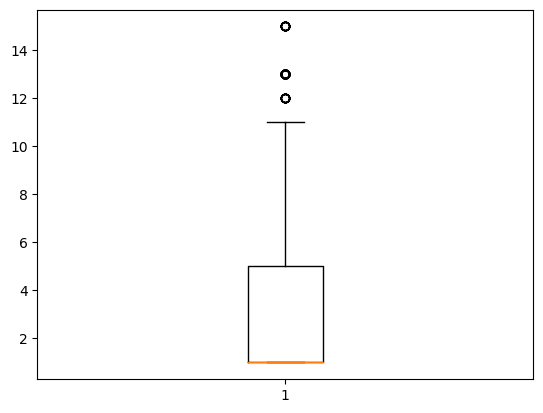

In [68]:
plt.boxplot(df_box.Product1)

<Axes: >

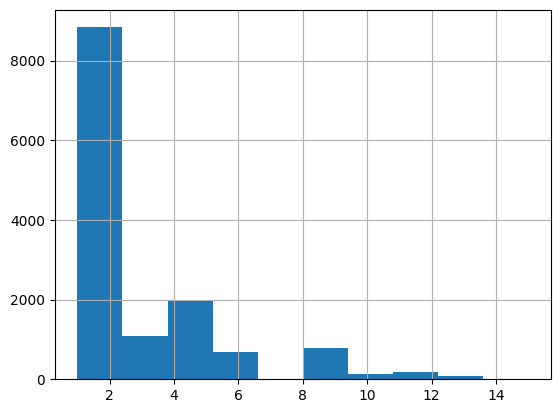

In [24]:
df_box['Product1'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7939e34b0af0>,
 'caps': [<matplotlib.lines.Line2D at 0x7939e34b3e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7939e34b1810>],
 'medians': [<matplotlib.lines.Line2D at 0x7939e34b3d60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7939e34b3010>],
 'means': []}

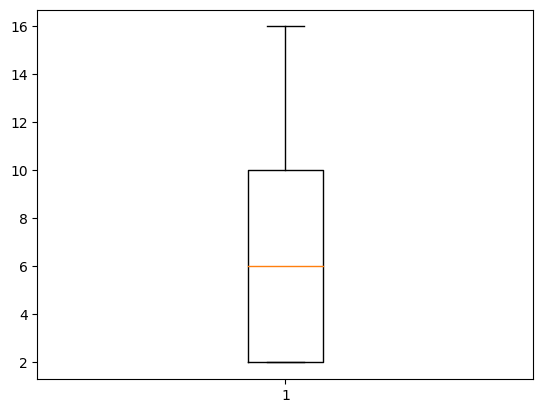

In [69]:
plt.boxplot(df_box.Product2)

<Axes: >

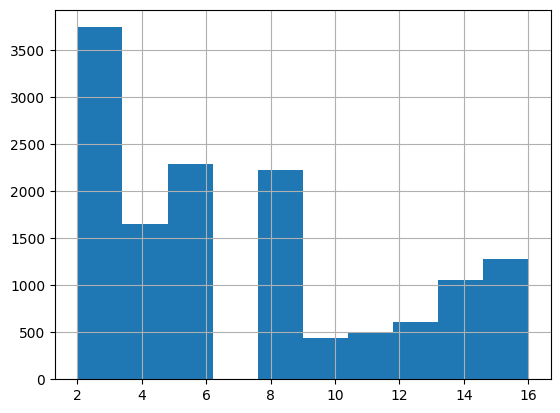

In [25]:
df_box['Product2'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x7939e3952da0>,
 'caps': [<matplotlib.lines.Line2D at 0x7939e3952890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7939e3950a60>],
 'medians': [<matplotlib.lines.Line2D at 0x7939e3951630>],
 'fliers': [<matplotlib.lines.Line2D at 0x7939e39512d0>],
 'means': []}

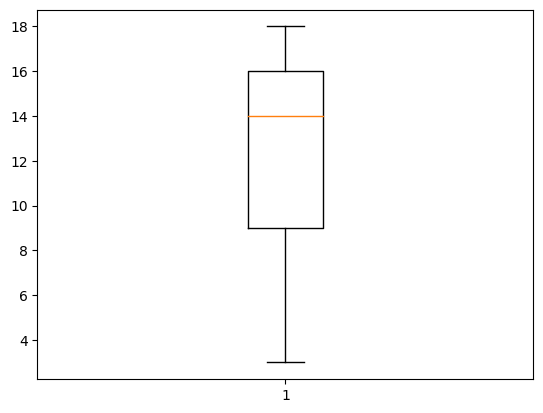

In [70]:
plt.boxplot(df_box.Product3)

<Axes: >

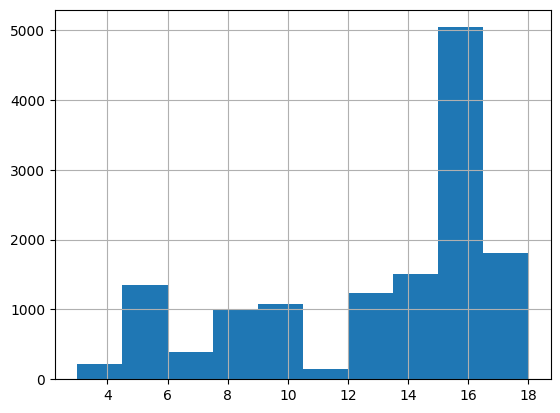

In [26]:
df_box['Product3'].hist()

##Heatmap

In [27]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City', 'Years',
       'Marital_Status', 'Product1', 'Product2', 'Product3', 'Purchase'],
      dtype='object')

<Axes: ylabel='User_ID'>

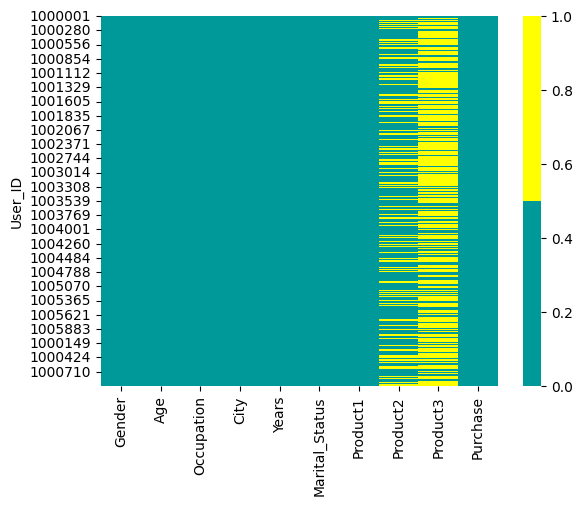

In [31]:
cols = df.columns
colours = ['#009999','#ffff00']
#yellow for missing value
sns.heatmap(df[cols].isnull(),cmap=sns.color_palette(colours))

##Mean Imputation

In [32]:
df.isnull().sum()

Gender                0
Age                   0
Occupation            0
City                  0
Years                 0
Marital_Status        0
Product1              0
Product2          14141
Product3          31385
Purchase              1
dtype: int64

In [35]:
med1 = df['Product2'].median()
print(med1)

9.0


In [38]:
df['Product2'] = df['Product2'].fillna(med1)

In [39]:
med2 = df['Product3'].median()
print(med2)

14.0


In [40]:
df['Product3'] = df['Product3'].fillna(med2)

In [41]:
med3 = df['Purchase'].median()
print(med3)

8052.0


In [42]:
df['Purchase'] = df['Purchase'].fillna(med3)

In [43]:
df.isnull().sum()

Gender            0
Age               0
Occupation        0
City              0
Years             0
Marital_Status    0
Product1          0
Product2          0
Product3          0
Purchase          0
dtype: int64

##Scatterplot


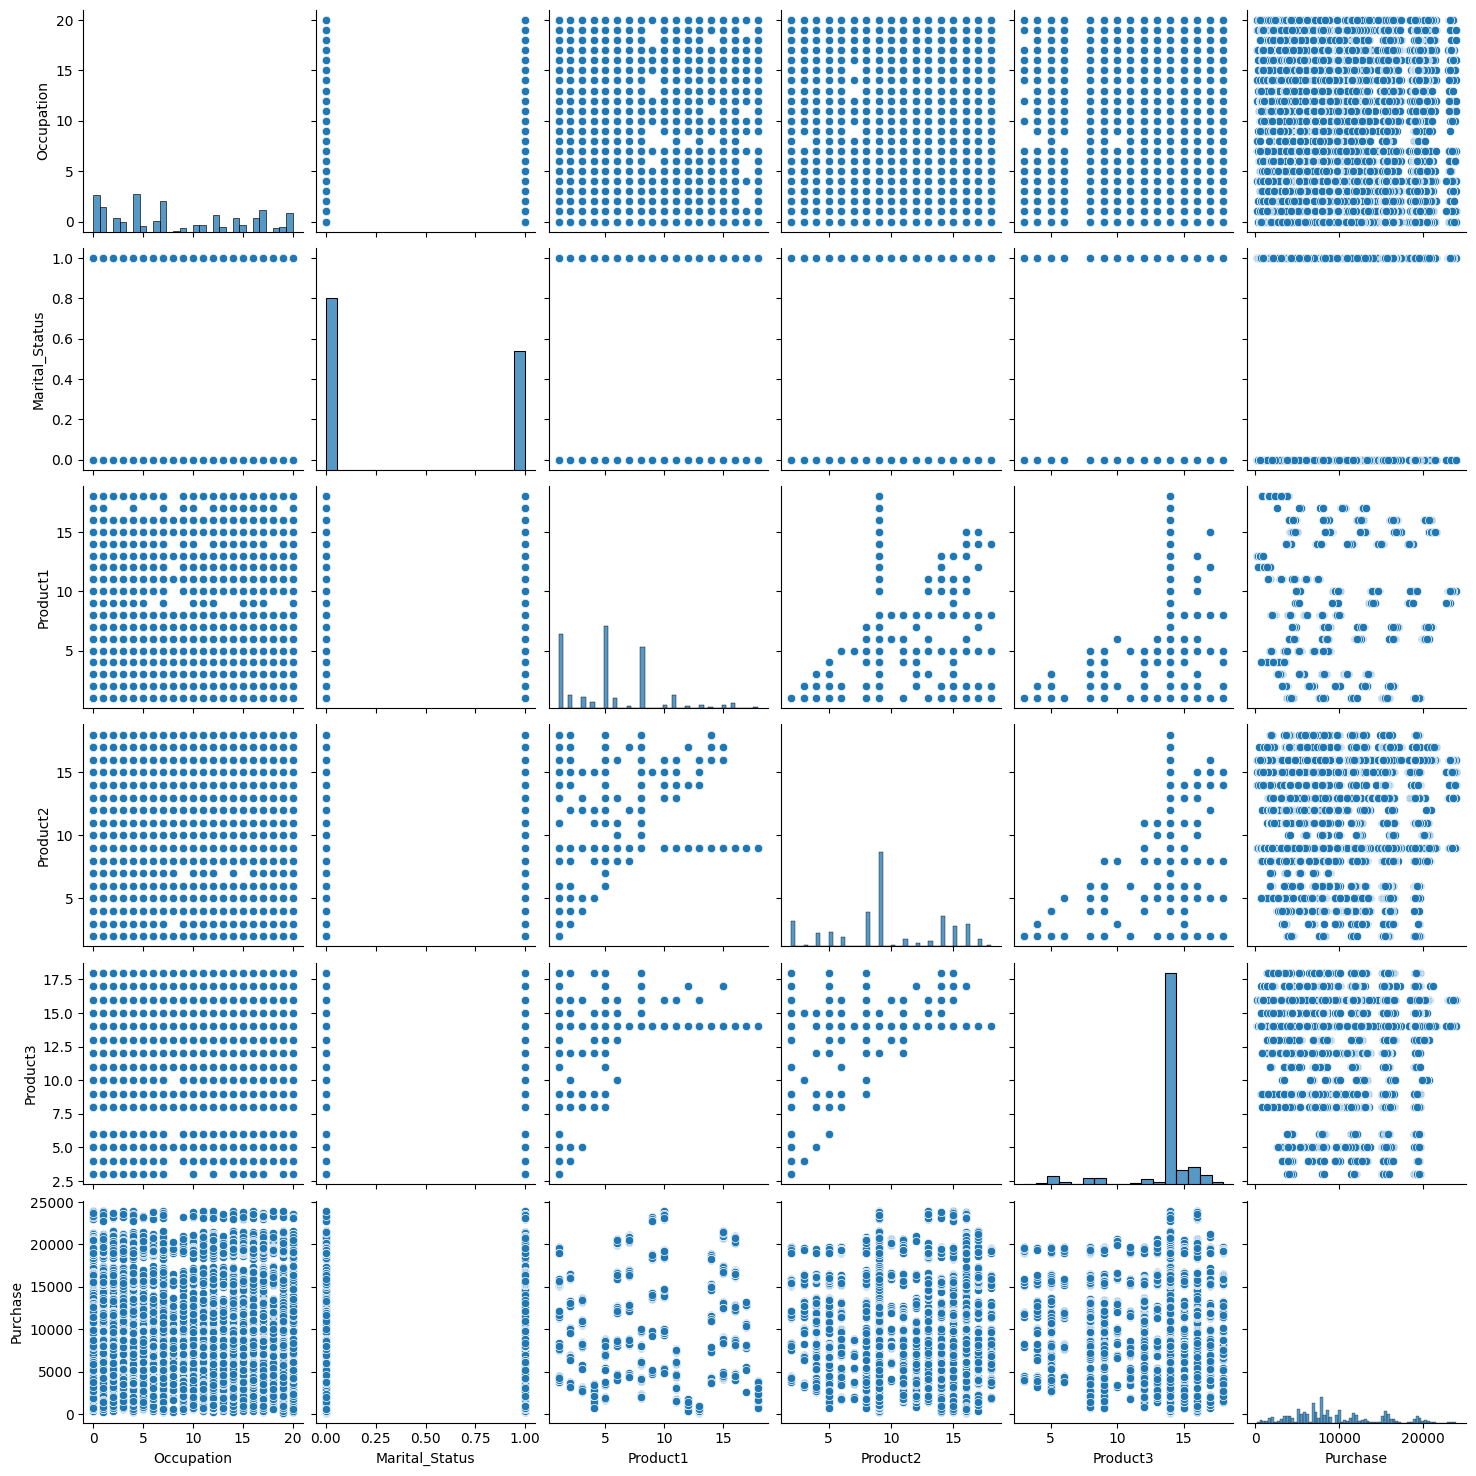

In [44]:
sns.pairplot(df)